<a href="https://colab.research.google.com/github/hadisotudeh/tbj_task/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1><b>Toronto Blue Jays Task - Hadi Sotudeh</b></h1> </center>

This notebook contains both the code and documentation of what I did as part of the `Toronto Blue Jays`' hiring process. 
</br>
</br>
I chose the first question (`Pitch Command`) in the provided pdf file to answer (among the two options).
</br>
</br>
First, I need to install the notebook dependencies, import the relevant libraries, download the dataset, and have them available in Google Colab.

## Install Dependencies, Import Libraries, and Download the dataset

In [ ]:
# Import Libraries

# general libraries
import warnings
import os

# machine learning libraries
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from pandas_profiling import ProfileReport
import joblib

In [ ]:
%%capture

#download and unzip dataset
! rm -rf dataset/
! wget https://www.dropbox.com/s/4ov96gqhcr7yxm9/dataset.zip
! unzip dataset.zip
! rm dataset.zip

## Set Global parameters

In [ ]:
#show plots inside the jupyter notebook
%matplotlib inline

# pandas settings to show more columns are rows in the jupyter notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50000)

# don't show warnings
warnings.filterwarnings('ignore')

# variables
dataset_folder = "dataset/"
dataset_file = dataset_folder + "fastballcommand.xlsx"

## Read Input Dataset

In [ ]:
df = pd.read_excel(dataset_file,sheet_name="TBJExercise")

# sorting the dataset
df.sort_values(by=["GameID","GamePitchSequence","Inning","PAofInning","AtBatPitchSequence"],inplace=True)

df["EventID"] =  df.apply(lambda r: r['GameID'] + str(r['GamePitchSequence']), axis=1)
df["InningID"] = df.apply(lambda r: r['GameID'] + str(r['Inning']), axis=1)
df["PlateID"] = df.apply(lambda r: r['GameID'] + str(r['PAofInning']), axis=1)

print(f"Number of seasons are {df.YearID.nunique()}")
print(f"Number of matches are {df.GameID.nunique()}")
print(f"Number of events are {df.EventID.nunique()}")

Number of seasons are 3
Number of matches are 283
Number of events are 12481


## Calculate Basic Statistics of Each Pitcher

In [ ]:
pitchers = list(df["PitcherID"].unique())

results = []
for pitcher in pitchers:
  result = {}
  pitcher_df = df[df["PitcherID"]==pitcher]
  result["PitcherID"] = pitcher
  result["NG"] = pitcher_df["GameID"].nunique()
  result["NP"] = pitcher_df.shape[0]

  result["NP"] = pitcher_df.shape[0]
  result["P/G"] = result["NP"]/result["NG"]

  inning_numbers = pitcher_df["InningID"].nunique()
  result["P/IP"] = result["NP"]/inning_numbers

  plate_numbers = pitcher_df["PlateID"].nunique()
  result["P/PA"] = result["NP"]/plate_numbers
  
  results.append(result)

results_df = pd.DataFrame(results)
results_df.round(2)

,PitcherID,NG,NP,P/G,P/IP,P/PA
0,1594,40,1527,38.17,6.06,6.94
1,2779,50,2233,44.66,8.09,7.20
2,2696,67,2246,33.52,10.40,6.59
3,857,71,4528,63.77,11.15,11.35
4,114013,56,1947,34.77,5.76,6.78


## Velocity Boxplot per Pitcher

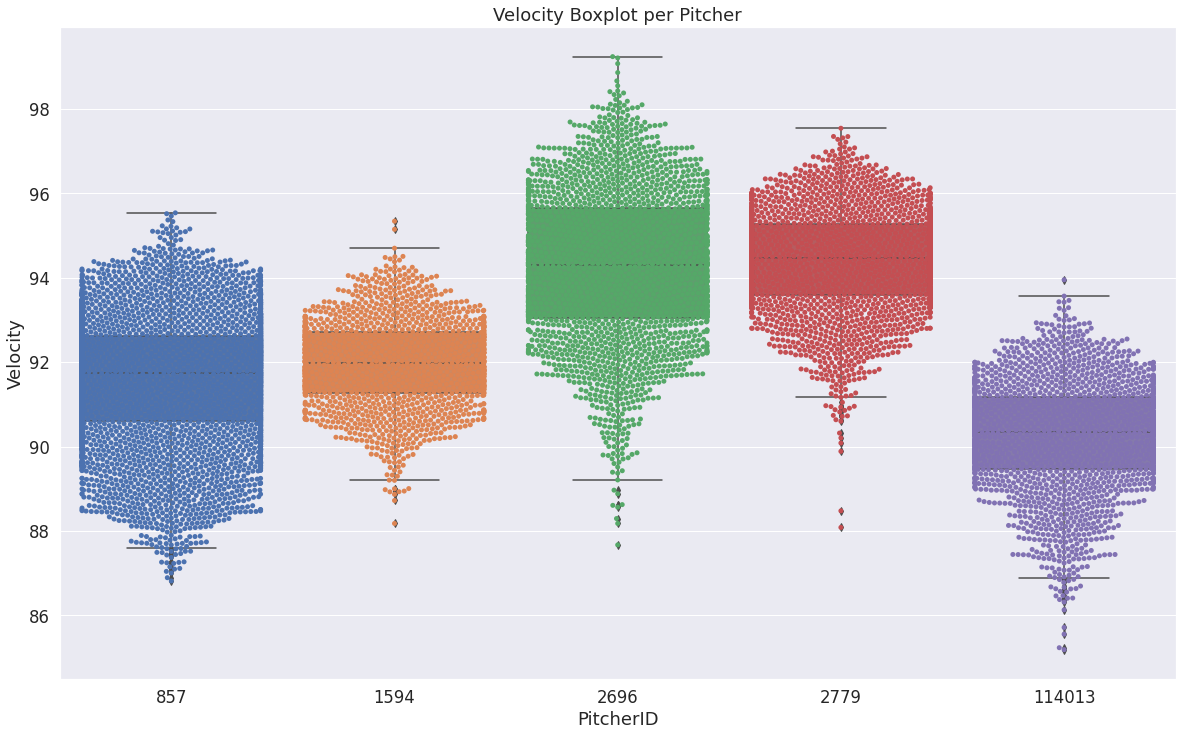

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,12)})
sns.set(font_scale=1.5)

ax = sns.boxplot(x="PitcherID", y="Velocity", data=df).set_title('Velocity Boxplot per Pitcher')
ax = sns.swarmplot(x="PitcherID", y="Velocity", data=df)

## Vertical vs. Horizontal break of pitches per pitcher

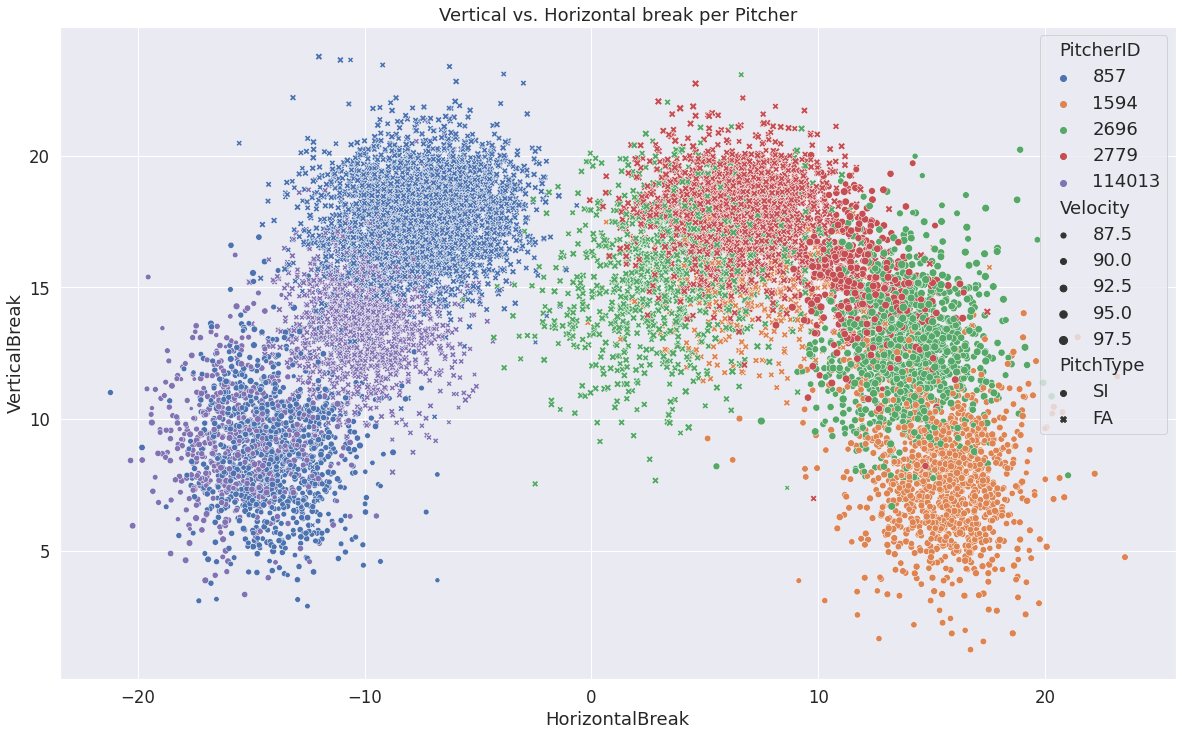

In [ ]:
sns.scatterplot(x="HorizontalBreak", y="VerticalBreak", hue="PitcherID", size="Velocity", palette="deep", style="PitchType", data=df).set_title('Vertical vs. Horizontal break per Pitcher');

#**THE END!**